In [29]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre processing
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

# Metrics
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [30]:
# Read data
heart_attack_df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
heart_attack_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
heart_attack_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [32]:
heart_attack_df[heart_attack_df['chol'] > 240].shape

(151, 14)

In [33]:
# Verify na values
heart_attack_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# ****EDA

# Data Visualization

In [34]:
def hist_box_plot(df, coluna, altura=15, largura=5):
    fig, axes = plt.subplots(1, 2, figsize=(altura, largura))
    sns.histplot(ax=axes[0], data = df[coluna]);
    axes[0].set_title(f'{coluna} Histplot')
    sns.boxplot(ax=axes[1], data = df[coluna]);
    axes[1].set_title(f'{coluna} Boxplot')
    plt.show();

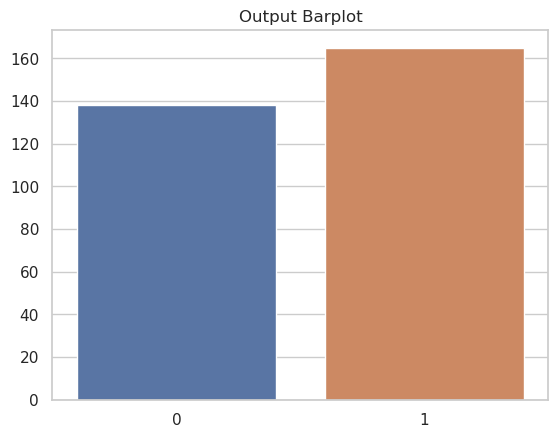

In [35]:
plt.title('Output Barplot')
sns.barplot(x=heart_attack_df['output'].value_counts().index, y=heart_attack_df['output'].value_counts().values);

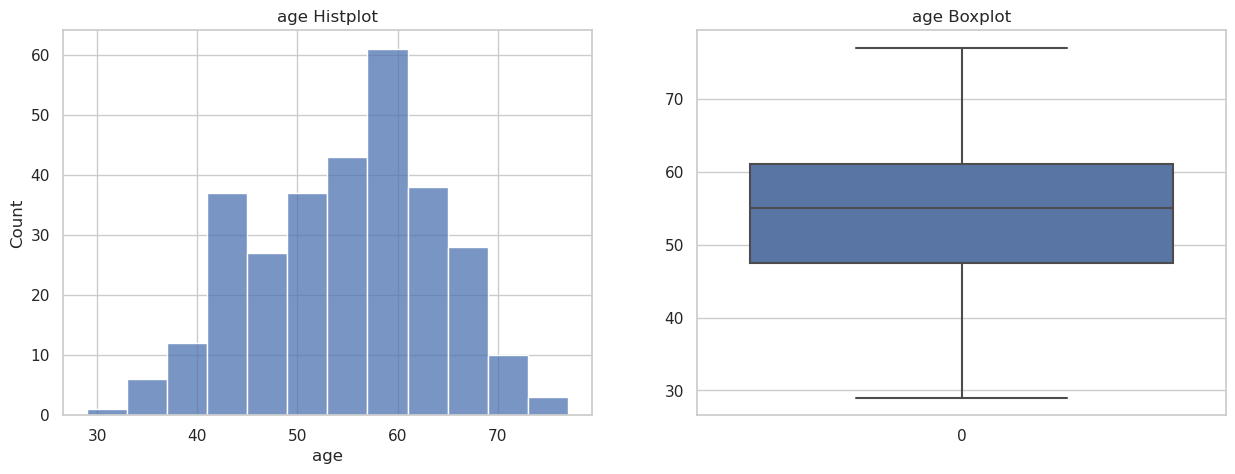

In [36]:
hist_box_plot(heart_attack_df, 'age')

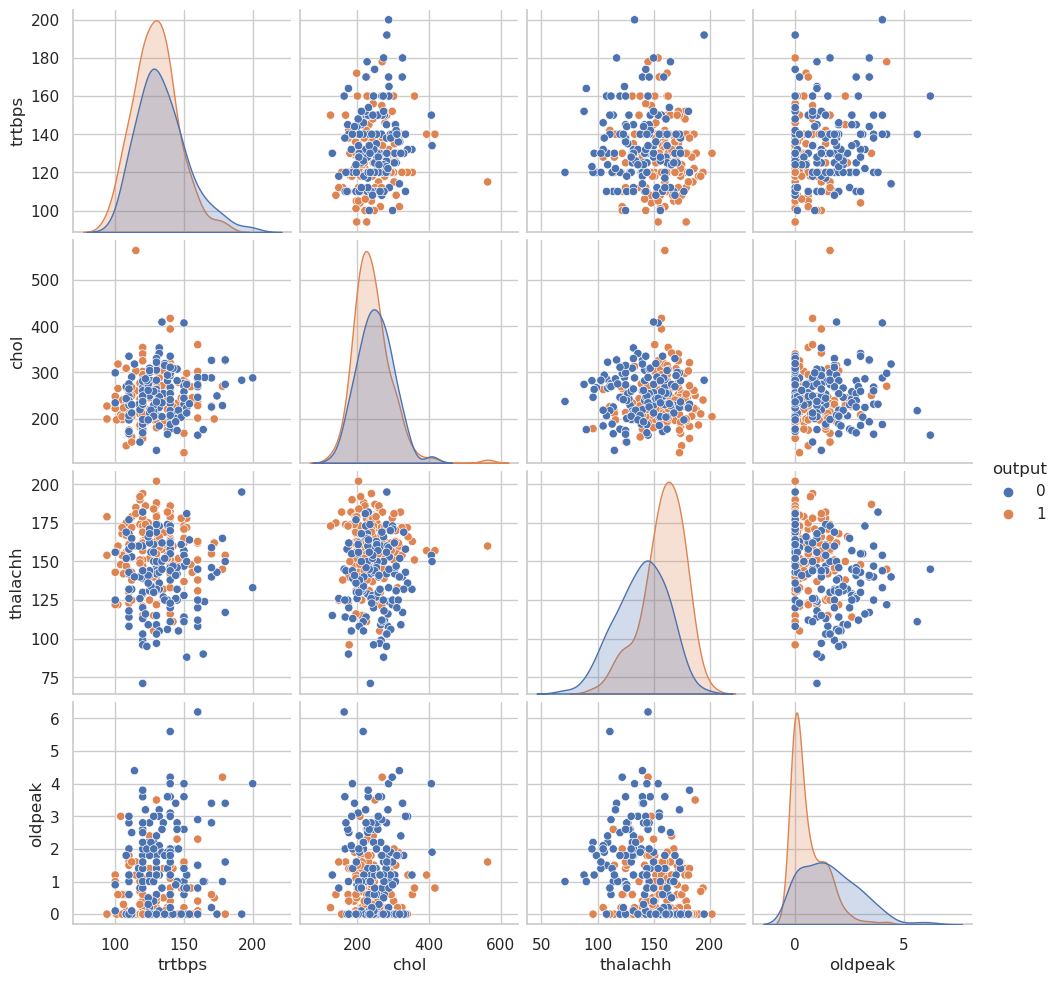

In [37]:
sns.pairplot(heart_attack_df[['trtbps', 'chol', 'thalachh', 'oldpeak', 'output' ]], hue='output');

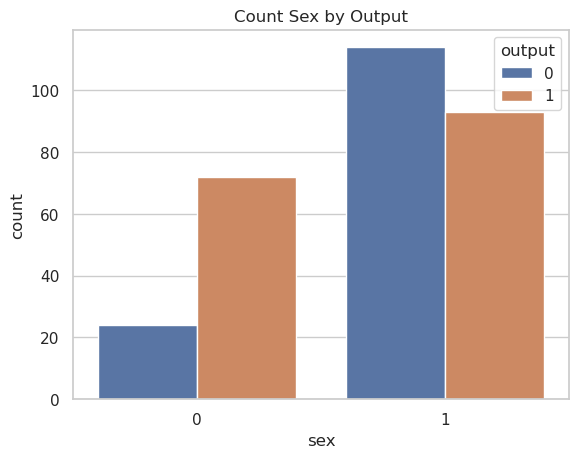

In [38]:
plt.title('Count Sex by Output')
sns.countplot(data=heart_attack_df, x='sex', hue='output');

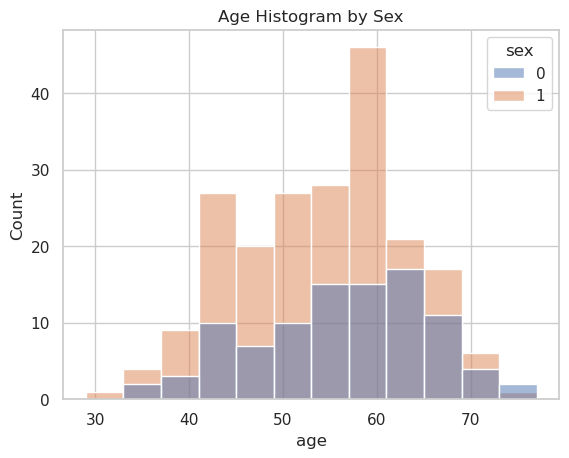

In [39]:
plt.title('Age Histogram by Sex')
sns.histplot(heart_attack_df, x='age', hue='sex');

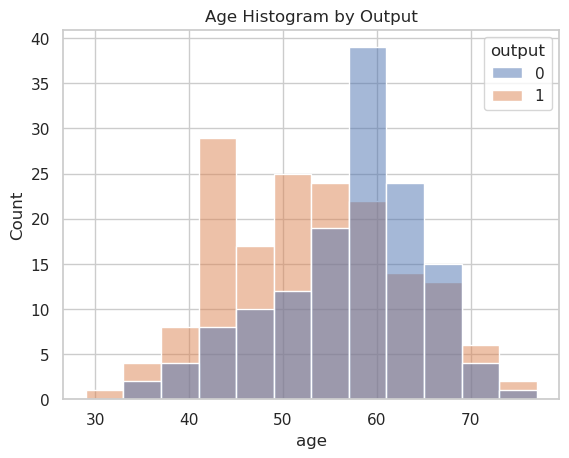

In [40]:
plt.title('Age Histogram by Output')
sns.histplot(heart_attack_df, x='age', hue='output');

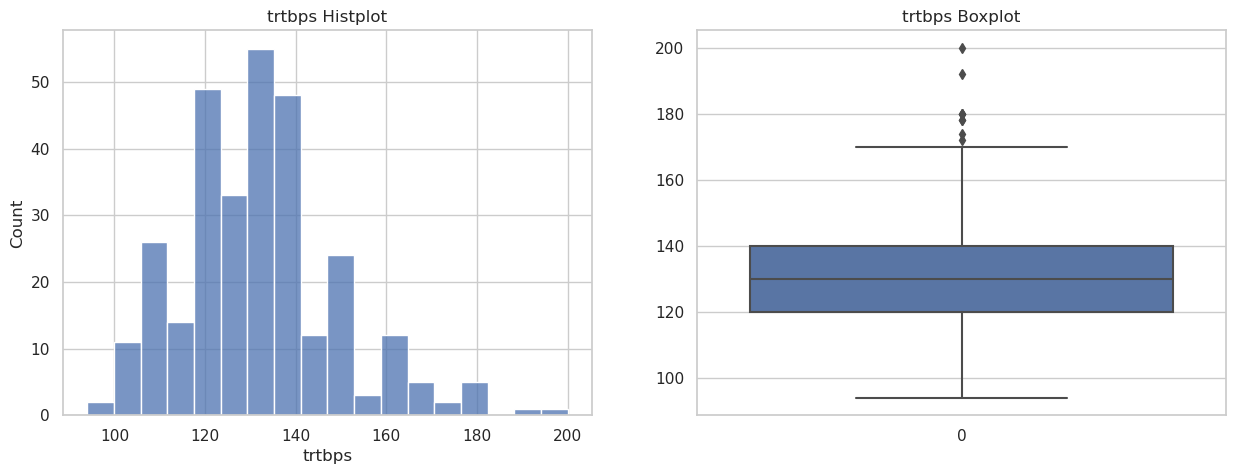

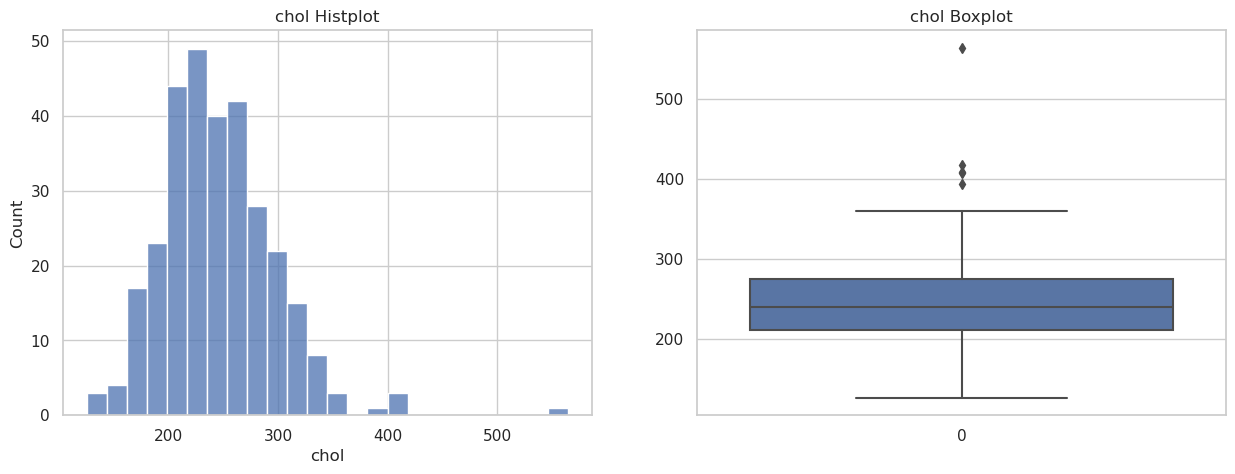

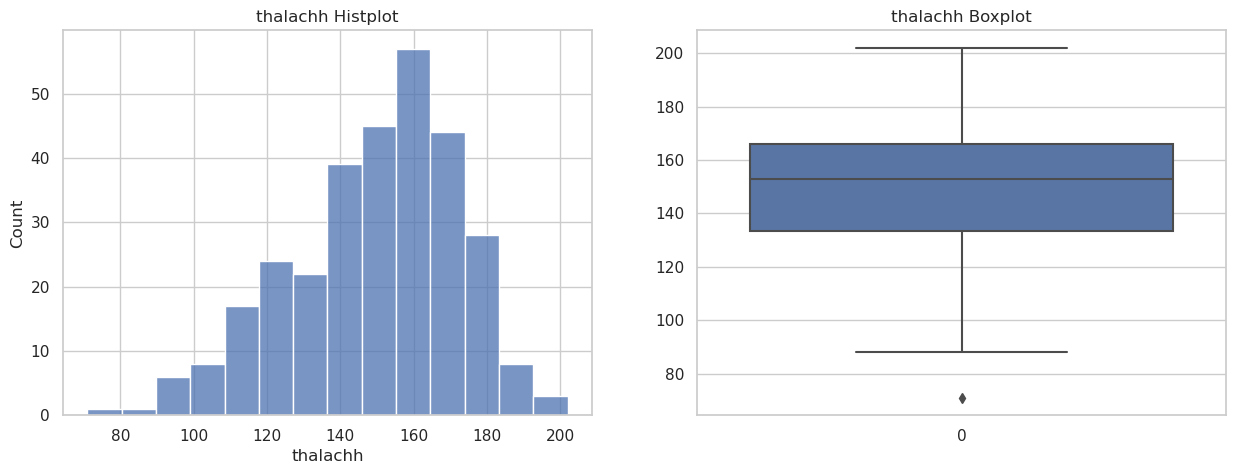

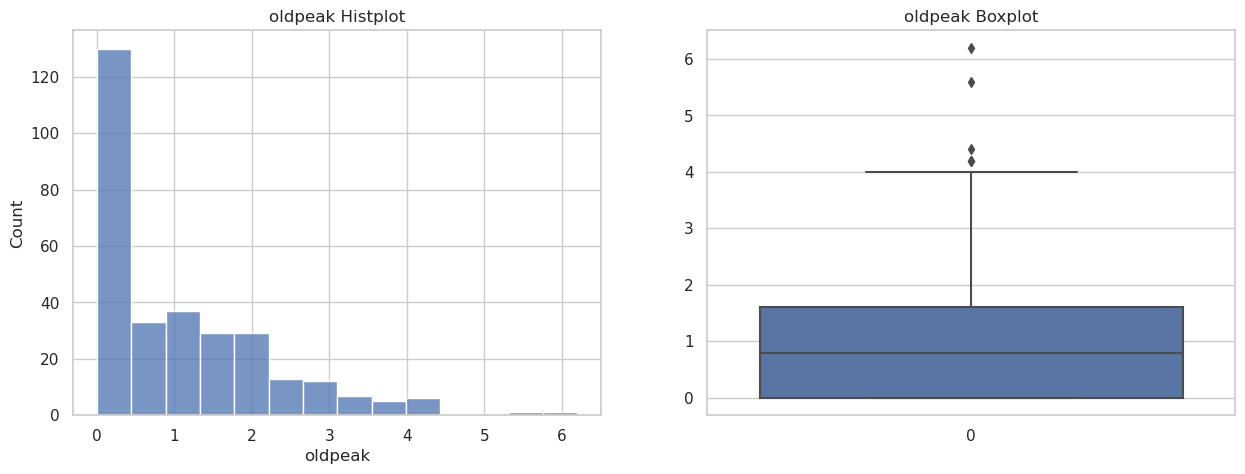

In [41]:
for col in ['trtbps', 'chol', 'thalachh', 'oldpeak']:
    hist_box_plot(heart_attack_df, col)

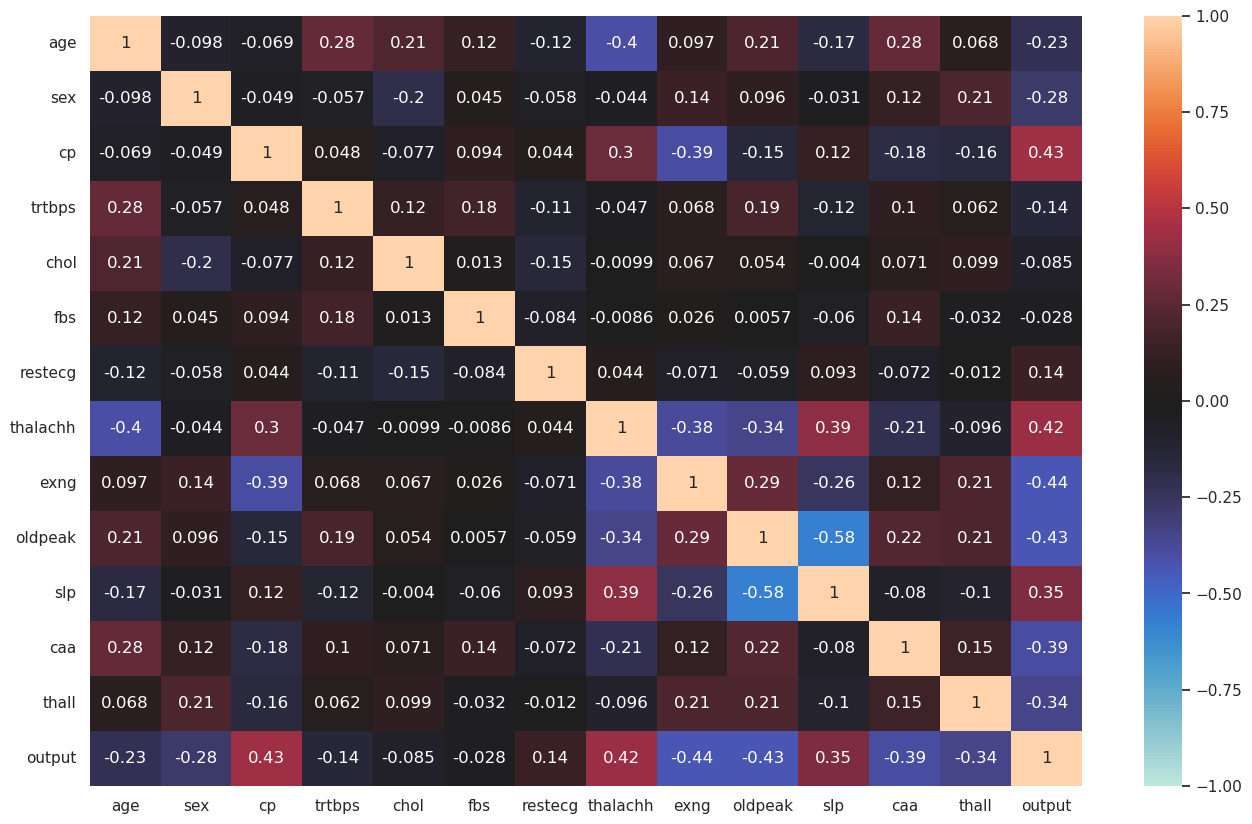

In [42]:
heart_corr = heart_attack_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(heart_corr, vmin=-1, center=0, vmax=1, annot=True);

# Pre Processing

In [43]:
scaler = StandardScaler()

In [44]:
X = np.array(heart_attack_df.drop('output', axis=1))
y = np.array(heart_attack_df['output'])

In [45]:
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.22, 
                                                    stratify=y,
                                                    shuffle=True, 
                                                    random_state=32165498)

print('Train size:', X_train.shape[0])
print('Test size:', X_test.shape[0])

Train size: 236
Test size: 67


# Train Models

In [47]:
def evaluate_model(y_pred, y_test):
    print(f'Acc: {np.round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%')
    print(f'F1: {np.round(metrics.f1_score(y_test, y_pred)*100, 2)}%')
    print(f'Recall: {np.round(metrics.recall_score(y_test, y_pred)*100, 2)}%')
    print(f'Precision: {np.round(metrics.precision_score(y_test, y_pred)*100, 2)}%')
    print('Matriz de Confusão:\n') 
    sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## Decision Tree

In [48]:
# Instantiating the model
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=6, 
                               max_features=9, 
                               random_state=42)
# Training model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Acc: 86.57%
F1: 87.67%
Recall: 88.89%
Precision: 86.49%
Matriz de Confusão:



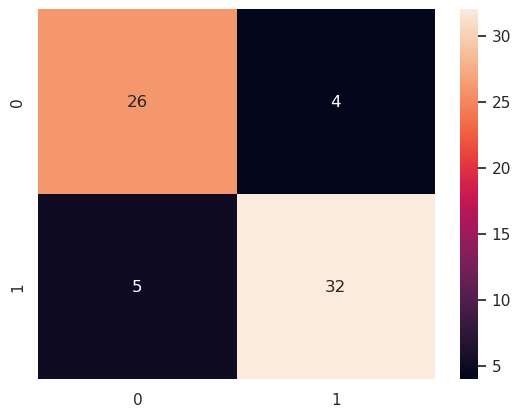

In [49]:
evaluate_model(y_pred, y_test)

## SVM

In [50]:
model = SVC(kernel='poly', 
            C=1.8,
            random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Acc: 89.55%
F1: 90.41%
Recall: 91.67%
Precision: 89.19%
Matriz de Confusão:



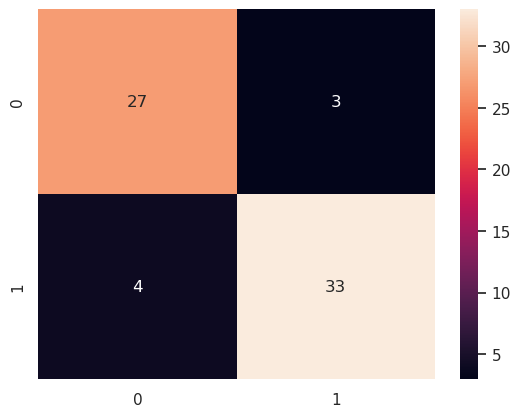

In [51]:
evaluate_model(y_pred, y_test)

## Logistic Regression

In [52]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Acc: 88.06%
F1: 89.47%
Recall: 94.44%
Precision: 85.0%
Matriz de Confusão:



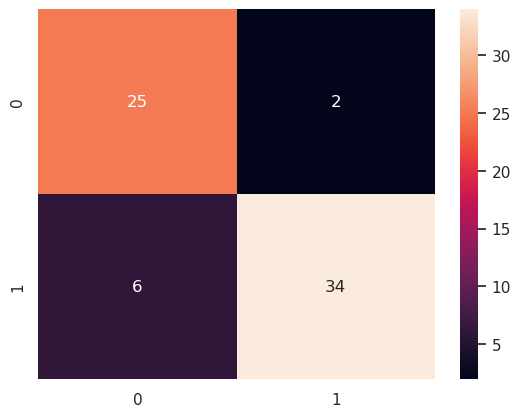

In [53]:
evaluate_model(y_pred, y_test)

## Random Forest

In [54]:
model = RandomForestClassifier(n_estimators=50, 
                               max_depth=4, 
                               random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Acc: 88.06%
F1: 89.19%
Recall: 91.67%
Precision: 86.84%
Matriz de Confusão:



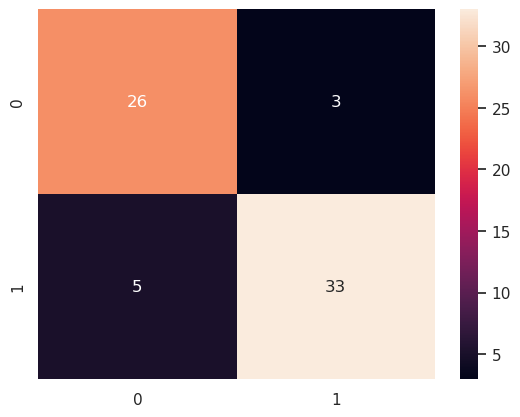

In [55]:
evaluate_model(y_pred, y_test)